In [149]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.cluster import SpectralClustering
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
bto_df_1K = pd.read_csv('tissue_distances_bto.csv', index_col=0)
all_df_1K = pd.read_csv('../../results/manuscript/tissue_distances_all_edges_top1000.csv', index_col=0)
gt_df_1K = pd.read_csv('../../results/manuscript/tissue_distances_significant_groundtruth_top1000.csv', index_col=0)
approx_df_1K = pd.read_csv('../../results/manuscript/tissue_distances_significant_approx_top1000.csv', index_col=0)

# Safety checks.
assert bto_df.index.equals(bto_df.columns), "BTO"
assert bto_df.index.equals(bto_df.columns), "BTO"
assert all_df.index.equals(all_df.columns), "all"
assert all_df.index.equals(all_df.columns), "all"
assert gt_df.index.equals(gt_df.columns), "gt"
assert gt_df.index.equals(gt_df.columns), "gt"
assert approx_df.index.equals(approx_df.columns), "approx"
assert approx_df.index.equals(approx_df.columns), "approx"
assert bto_df.index.equals(all_df.index), "unequal"
assert bto_df.index.equals(gt_df.index), "unequal"
assert bto_df.index.equals(approx_df.index), "unequal"

In [58]:
# Extract upper triangular values of each distance matrix.
bto_idx = np.triu_indices_from(bto_df, k=1)
bto_dists = bto_df.values[bto_idx]

all_idx = np.triu_indices_from(all_df, k=1)
all_dists = all_df.values[all_idx]

gt_idx = np.triu_indices_from(gt_df, k=1)
gt_dists = gt_df.values[gt_idx]

approx_idx = np.triu_indices_from(approx_df, k=1)
approx_dists = approx_df.values[approx_idx]

Correlation of all edges with BTO:  0.10097570726471594
Correlation of GT edges with BTO:  0.1255989468766248
Correlation of APPROX edges with BTO:  0.12647241581269997


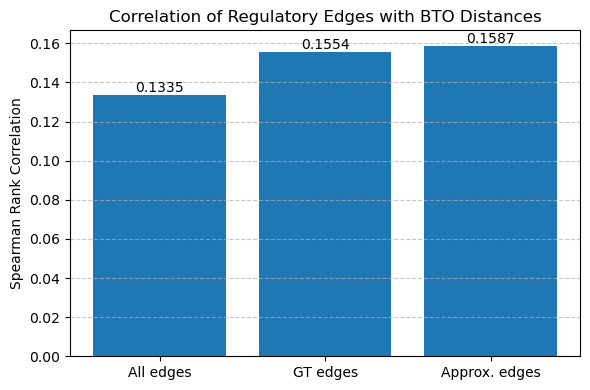

In [59]:
import matplotlib.pyplot as plt
print("Correlation of all edges with BTO: ", pearsonr(bto_dists, all_dists)[0])
print("Correlation of GT edges with BTO: ", pearsonr(bto_dists, gt_dists)[0])
print("Correlation of APPROX edges with BTO: ", pearsonr(bto_dists, approx_dists)[0])

corr_all = spearmanr(bto_dists, all_dists)[0]
corr_gt = spearmanr(bto_dists, gt_dists)[0]
corr_approx = spearmanr(bto_dists, approx_dists)[0]

# Prepare data for plotting
labels = ['All edges', 'GT edges', 'Approx. edges']
correlations = [corr_all, corr_gt, corr_approx]

# Create bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, correlations)

# Add correlation values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', 
             ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.ylabel('Spearman Rank Correlation')
plt.title('Correlation of Regulatory Edges with BTO Distances')
#plt.ylim(0, 1)  # optional: if you know all r are positive
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


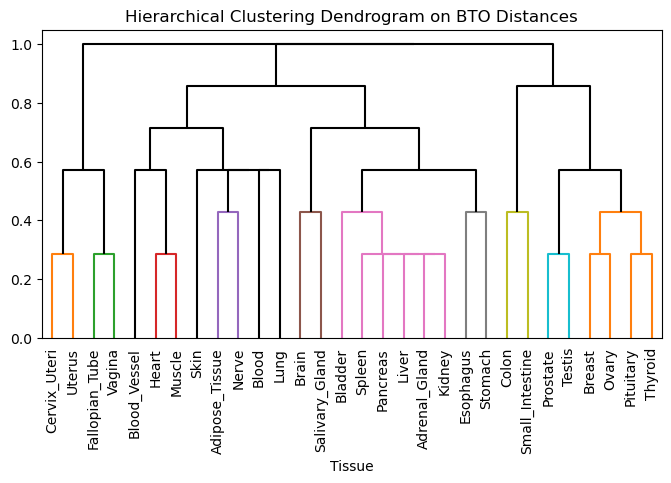

In [31]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

np.fill_diagonal(approx_df.values, 0.0)

condensed_dist = squareform(bto_df.values)
Z = sch.linkage(condensed_dist, method='complete')

plt.figure(figsize=(8, 4))
dendro = sch.dendrogram(Z, labels=bto_df.index, leaf_rotation=90, above_threshold_color='black', color_threshold=0.5)
plt.title("Hierarchical Clustering Dendrogram on BTO Distances")
plt.xlabel("Tissue")
plt.ylabel("")
plt.show()


0.9735525375268048
0.999304861624017


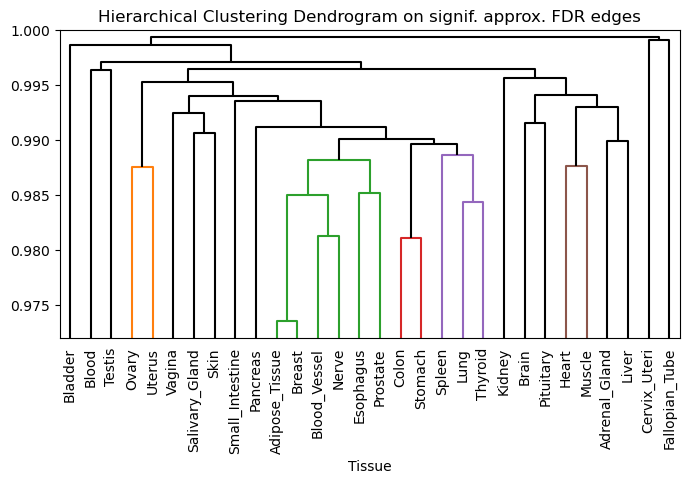

In [50]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

np.fill_diagonal(approx_df.values, 0.0)

condensed_dist = squareform(approx_df.values)
Z = sch.linkage(condensed_dist, method='complete')
print(min(Z[:, 2]))
print(max(Z[:, 2])) 

plt.figure(figsize=(8, 4))
dendro = sch.dendrogram(Z, labels=approx_df.index, leaf_rotation=90, above_threshold_color='black', color_threshold=0.989)
plt.title("Hierarchical Clustering Dendrogram on signif. approx. FDR edges")
plt.xlabel("Tissue")
plt.ylabel("")
plt.ylim(0.972, 1.0)
plt.show()

In [153]:
# Transform distance matrices into similarity matrices.
np.fill_diagonal(all_df.values, 0.0)
np.fill_diagonal(gt_df.values, 0.0)
np.fill_diagonal(approx_df.values, 0.0)


bto_sim = 1.0 - bto_df
approx_sim = 1.0 - approx_df
all_sim = 1.0 - all_df
gt_sim = 1.0 - gt_df


In [160]:
num_clusters = [2,3,4,5,6]
bto_clusterings = dict()
all_clusterings = dict()
gt_clusterings = dict()
approx_clusterings = dict()

for n in num_clusters:
    bto_sc = SpectralClustering(n_clusters=n, affinity='precomputed', random_state=42)
    bto_labels = bto_sc.fit_predict(bto_sim)
    # Create a dictionary mapping tissue names to cluster labels.
    bto_tissue_names = bto_sim.index.tolist()
    bto_cluster_dict = dict(zip(bto_tissue_names, bto_labels))
    
    approx_sc = SpectralClustering(n_clusters=n, affinity='precomputed', random_state=42)
    approx_labels = approx_sc.fit_predict(approx_sim)
    # Create a dictionary mapping tissue names to cluster labels.
    approx_tissue_names = approx_sim.index.tolist()
    approx_cluster_dict = dict(zip(approx_tissue_names, approx_labels))
    
    gt_sc = SpectralClustering(n_clusters=n, affinity='precomputed', random_state=42)
    gt_labels = gt_sc.fit_predict(gt_sim)
    # Create a dictionary mapping tissue names to cluster labels.
    gt_tissue_names = gt_sim.index.tolist()
    gt_cluster_dict = dict(zip(gt_tissue_names, gt_labels))
    
    all_sc = SpectralClustering(n_clusters=n, affinity='precomputed', random_state=42)
    all_labels = approx_sc.fit_predict(all_sim)
    # Create a dictionary mapping tissue names to cluster labels.
    all_tissue_names = all_sim.index.tolist()
    all_cluster_dict = dict(zip(all_tissue_names, all_labels))
    
    bto_clusterings[n] = bto_cluster_dict
    approx_clusterings[n] = approx_cluster_dict
    all_clusterings[n] = all_cluster_dict
    gt_clusterings[n] = gt_cluster_dict
    

In [165]:
from scipy.optimize import linear_sum_assignment
import numpy as np

def compute_optimal_jaccard_scores(bto_clusterings, approx_clusterings):
    alignment_scores = {}

    for N in bto_clusterings.keys():
        bto = bto_clusterings[N]
        approx = approx_clusterings[N]

        tissues = list(bto.keys())
        bto_clusters = sorted(set(bto.values()))
        approx_clusters = sorted(set(approx.values()))

        n_bto = len(bto_clusters)
        n_approx = len(approx_clusters)

        # Compute Jaccard similarity matrix
        jaccard = np.zeros((n_bto, n_approx))
        for i, bto_c in enumerate(bto_clusters):
            bto_set = {t for t in tissues if bto[t] == bto_c}
            for j, approx_c in enumerate(approx_clusters):
                approx_set = {t for t in tissues if approx[t] == approx_c}
                intersection = len(bto_set & approx_set)
                union = 30 #len(bto_set | approx_set)
                jaccard[i, j] = intersection / union if union > 0 else 0.0

        # Solve assignment problem (maximize total Jaccard)
        cost_matrix = -jaccard
        row_ind, col_ind = linear_sum_assignment(cost_matrix)

        # Compute achieved optimal similarity
        total_similarity = jaccard[row_ind, col_ind].sum()
        mean_similarity = jaccard[row_ind, col_ind].mean()

        alignment_scores[N] = float(total_similarity)

    return alignment_scores

In [166]:
all_jaccards = compute_optimal_jaccard_scores(bto_clusterings, all_clusterings)
gt_jaccards = compute_optimal_jaccard_scores(bto_clusterings, gt_clusterings)
approx_jaccards = compute_optimal_jaccard_scores(bto_clusterings, approx_clusterings)
all_jaccards

{2: 0.8333333333333334,
 3: 0.5333333333333333,
 4: 0.4666666666666667,
 5: 0.5333333333333333,
 6: 0.4333333333333333}

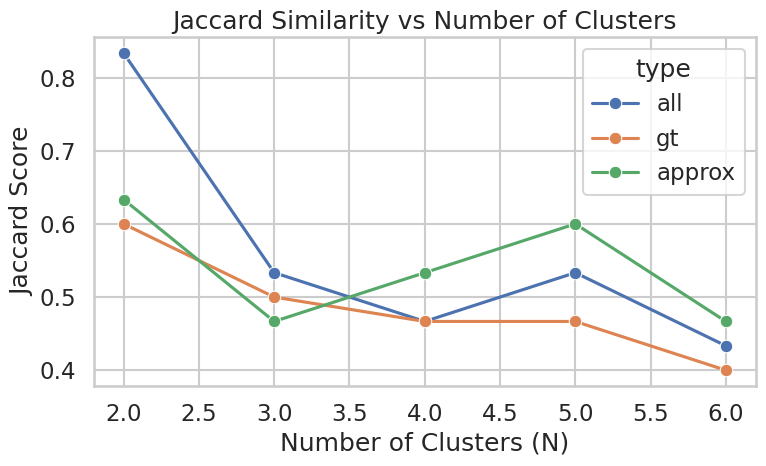

In [167]:
df = pd.DataFrame({
    'N': list(all_jaccards.keys()),
    'all': list(all_jaccards.values()),
    'gt': list(gt_jaccards.values()),
    'approx': list(approx_jaccards.values())
})

# Melt to long format for seaborn
df_melted = df.melt(id_vars='N', var_name='type', value_name='jaccard')

# Plot
sns.set(style='whitegrid', context='talk')
plt.figure(figsize=(8,5))
sns.lineplot(data=df_melted, x='N', y='jaccard', hue='type', marker='o')
plt.title('Jaccard Similarity vs Number of Clusters')
plt.xlabel('Number of Clusters (N)')
plt.ylabel('Jaccard Score')
plt.tight_layout()
plt.show()

In [146]:
bto_heatmap_df = pd.DataFrame(bto_clusterings).T  # transpose so N is rows
bto_heatmap_df = bto_heatmap_df.sort_index(ascending=False)        # ensure N is ascending
approx_heatmap_df = pd.DataFrame(approx_clusterins_opt).T
approx_heatmap_df = approx_heatmap_df.sort_index(ascending=False)

# Optional: make tissue order sorted or custom
tissues = bto_heatmap_df.columns.tolist()
approx_heatmap_df

# Plot heatmap
#plt.figure(figsize=(12, 5))
#sns.heatmap(bto_heatmap_df, annot=True, fmt="d", cmap="Set2", cbar=False)#cbar_kws={'label': 'Cluster ID'})
#plt.xlabel("Tissue")
#plt.ylabel("Number of clusters")
#plt.title("")
#plt.show()

,Adipose_Tissue,Adrenal_Gland,Bladder,Blood,Blood_Vessel,Brain,Breast,Cervix_Uteri,Colon,Esophagus,...,Prostate,Salivary_Gland,Skin,Small_Intestine,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina
5,3,0,1,3,3,0,3,2,4,4,...,1,4,3,4,4,4,0,1,1,1
4,2,1,0,1,2,1,2,3,0,0,...,0,0,2,0,0,0,1,2,2,0
3,1,0,2,0,1,0,1,2,2,2,...,2,2,1,2,0,2,0,1,1,2
2,1,0,1,0,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,1,1


In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

Pvalue of all =  0.005297915199288008
Pvalue of all =  0.001150630710842819
Pvalue of all =  0.000893894831436524


/tmp/ipykernel_502284/3948684511.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_bar, rotation=45, ha='right', fontsize=label_fontsize-4)


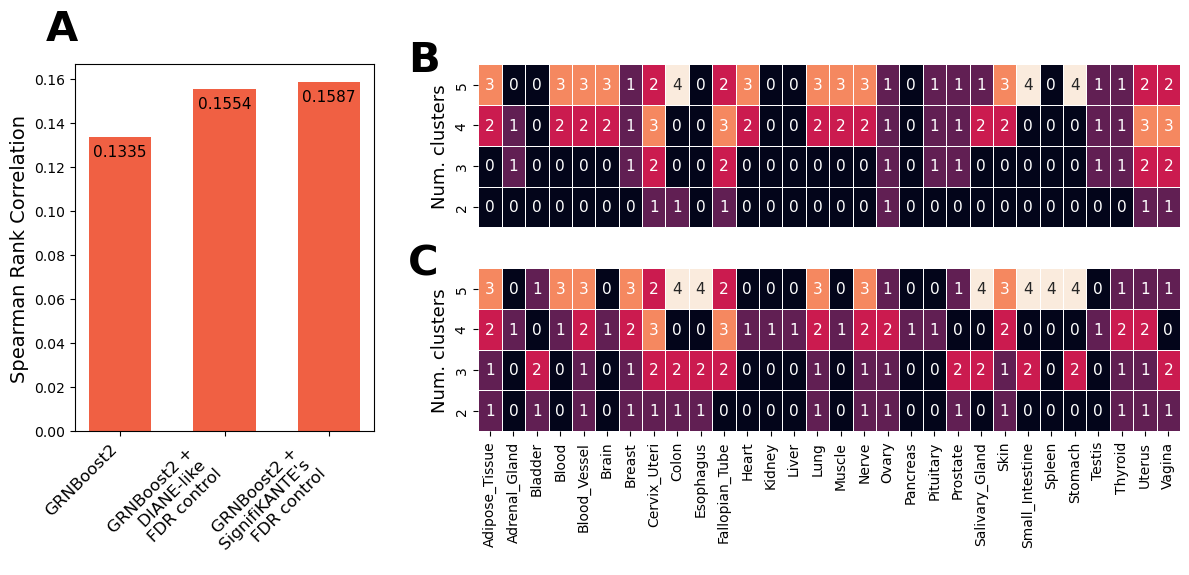

In [148]:
# Create one large mosaic plot.
fig, axs = plt.subplot_mosaic([['A', 'B', 'B'], ['A', 'C', 'C']])
fig.set_size_inches(12, 6)
axs_list = list(axs.values())
label_fontsize = 16

### Barplot for correlations.
corr_all = spearmanr(bto_dists, all_dists)[0]
corr_gt = spearmanr(bto_dists, gt_dists)[0]
corr_approx = spearmanr(bto_dists, approx_dists)[0]
print("Pvalue of all = ", spearmanr(bto_dists, all_dists)[1])
print("Pvalue of all = ", spearmanr(bto_dists, gt_dists)[1])
print("Pvalue of all = ", spearmanr(bto_dists, approx_dists)[1])

# Prepare data
labels_bar = [
    "GRNBoost2", 
    'GRNBoost2 + \nDIANE-like \nFDR control', 
    'GRNBoost2 + \nSignifiKANTE\'s \nFDR control'
]
correlations = [corr_all, corr_gt, corr_approx]  # your computed correlations

ax = axs['A']  # bar plot goes into mosaic subplot 'A'

rocket_colors = sns.color_palette("rocket", 5)

# Pick a color, e.g., the middle one or the darkest
bar_color = rocket_colors[3]  # index 0=lightest, 4=darkest

# Use this color in your bar plot
bars = ax.bar(labels_bar, correlations, color=bar_color, width=0.6)

# Annotate bars with correlation values
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        yval-0.01, 
        f'{yval:.4f}', 
        ha='center', 
        va='bottom', 
        fontsize=label_fontsize-5
    )

# Rotate x-axis labels by 45 degrees and keep line breaks
ax.set_xticklabels(labels_bar, rotation=45, ha='right', fontsize=label_fontsize-4)

# Optional: labels, title, grid
ax.set_ylabel('Spearman Rank Correlation', fontsize=label_fontsize-2)
#ax.grid(axis='y', linestyle='--', alpha=0.7)

### Heatmap for BTO clustering. 
heat_approx = sns.heatmap(
    bto_heatmap_df,
    cmap="rocket",
    linewidths=0.5,
    linecolor='white',
    annot=True, 
    fmt="d",
    annot_kws={"size":label_fontsize-5},
    cbar=False,
    ax=axs['B']
    ) 

axs['B'].set_xticks([])       
axs['B'].set_xticklabels([])
axs['B'].set_ylabel("Num. clusters", fontsize=label_fontsize-3)

### Heatmap for approx. clustering.
heat_approx = sns.heatmap(
    approx_heatmap_df,
    cmap="rocket",
    linewidths=0.5,
    linecolor='white',
    annot=True, 
    fmt="d",
    annot_kws={"size":label_fontsize-5},
    cbar=False,
    ax=axs['C']
    ) 
axs['C'].set_ylabel("Num. clusters", fontsize=label_fontsize-3)
    
labels = {'A': 'A', 'B': 'B', 'C': 'C'}

for key, label in labels.items():
    ax = axs[key]
    ax.text(
        -0.1, 1.15, label,  # x, y (in axes fraction coords)
        transform=ax.transAxes,
        fontsize=30,
        fontweight='bold',
        va='top',
        ha='left'
    )
   
fig.tight_layout()
fig.subplots_adjust(hspace=0.25, wspace=0.35)
plt.savefig("results_brenda_tissue_ontology.pdf")